MSD-I dataset (mapping, metadata, annotations and links to images)
Data splits and feature vectors for TISMIR single-label classification experiments 

In [1]:
import numpy as np
import pandas as pd
import json
import tqdm
from collections import Counter
import collections

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Load clean dataset

In [3]:
dataset_clean = pd.read_csv("dataset_clean.csv")

In [4]:
dataset_clean.head()

,msd_track_id,genre,album_index,set,msd_artist_id,image_url,song_title,song_lyrics,artist,lyrics_link,lyrics_text,lyrics
0,TRABKJU128F422A7FE,Metal,0,train,ARBD4QW1187FB42153,http://artwork-cdn.7static.com/static/img/slee...,The Illusionist,NaN,Scar Symmetry,https://www.lyricsfreak.com/s/scar+symmetry/th...,as an outcast i paced defeat seeking comfort i...,as an outcast i paced defeat seeking comfort i...
1,TRDMMDE128F14A9052,Rock,2,train,ARJVTRE1187B9959C0,http://artwork-cdn.7static.com/static/img/slee...,Weekend Driver,NaN,Foghat,https://www.lyricsfreak.com/f/foghat/weekend+d...,dave peverett - riff bros. music - ascap waiti...,dave peverett - riff bros. music - ascap waiti...
2,TRJOPZB128F4250E02,Rock,4,train,AR62BB21187B9AC83D,http://artwork-cdn.7static.com/static/img/slee...,Too Alive,NaN,The Breeders,https://www.lyricsfreak.com/b/breeders/too+ali...,i took off when will will make no way steal it...,i took off when will will make no way steal it...
3,TRJKBVL128F935567B,Rock,5,train,AR7GVOV1187B9B5FF1,http://artwork-cdn.7static.com/static/img/slee...,Ride The Darker Wave,NaN,Sebadoh,https://www.lyricsfreak.com/s/sebadoh/ride+the...,you make your words so nice i'm waiting you to...,you make your words so nice i'm waiting you to...
4,TRUSOQD128F92CFEA5,Rock,7,train,ARZHQDD1187FB5B871,http://artwork-cdn.7static.com/static/img/slee...,Carmen,Last night she ran away \nLeft a letter by th...,Lush,https://www.lyricsfreak.com/l/lush/carmen_2008...,(anderson/berenyi) carmen tells me what she's ...,(anderson/berenyi) carmen tells me what she's ...


In [7]:
unique_genres = np.unique(dataset_clean.genre)

In [8]:
genres_dict = dict(zip(unique_genres, np.arange(len(unique_genres))))

In [9]:
genres_dict 

{'Blues': 0,
 'Country': 1,
 'Electronic': 2,
 'Folk': 3,
 'Jazz': 4,
 'Latin': 5,
 'Metal': 6,
 'New Age': 7,
 'Pop': 8,
 'Punk': 9,
 'Rap': 10,
 'Reggae': 11,
 'RnB': 12,
 'Rock': 13,
 'World': 14}

In [ ]:
def create_tsv_file(path_in, path_out):
    dataset_clean = pd.read_csv(path_in)
    with open(path_in,'r') as f, open(path_out,'w') as fw:
        writer = csv.writer(fw, delimiter='\t')
        writer.writerow(['label','body'])
        for label, line in tqdm.tqdm(zip(dataset_clean.genre.values, 
                                         dataset_clean.lyrics_clean.values), total=len(dataset_clean)):
            #label = LABEL_TO_INDEX[tokens[-1]]
            label = LABEL_TO_INDEX[label]
            body = ' '.join(tokens[:-1])
            writer.writerow([label, line])

In [ ]:
def create_tsv_file(path_in, path_out):

    
        with open(path_out,'w') as fw:
            writer = csv.writer(fw, delimiter='\t')
            writer.writerow(['label','body'])
            for line in f:
                tokens = [x.lower() for x in line.split()]
                label = LABEL_TO_INDEX[tokens[-1]]
                body = ' '.join(tokens[:-1])
                writer.writerow([label, body])

# Stats

In [5]:
train_stats = Counter(dataset_clean[dataset_clean.set == 'train'].genre)
train_stats = collections.OrderedDict(sorted(train_stats.items()))

In [6]:
val_stats = Counter(dataset_clean[dataset_clean.set == 'val'].genre)
val_stats = collections.OrderedDict(sorted(val_stats.items()))

In [7]:
test_stats = Counter(dataset_clean[dataset_clean.set == 'test'].genre)
test_stats = collections.OrderedDict(sorted(test_stats.items()))

In [8]:
len(train_stats)

15

In [9]:
train_stats

OrderedDict([('Blues', 137),
             ('Country', 627),
             ('Electronic', 684),
             ('Folk', 304),
             ('Jazz', 543),
             ('Latin', 72),
             ('Metal', 724),
             ('New Age', 42),
             ('Pop', 1153),
             ('Punk', 204),
             ('Rap', 646),
             ('Reggae', 312),
             ('RnB', 555),
             ('Rock', 2297),
             ('World', 32)])

In [10]:
train_stats.keys()

odict_keys(['Blues', 'Country', 'Electronic', 'Folk', 'Jazz', 'Latin', 'Metal', 'New Age', 'Pop', 'Punk', 'Rap', 'Reggae', 'RnB', 'Rock', 'World'])

In [11]:
" ".join(train_stats.keys())

'Blues Country Electronic Folk Jazz Latin Metal New Age Pop Punk Rap Reggae RnB Rock World'

In [12]:
val_stats

OrderedDict([('Blues', 28),
             ('Country', 66),
             ('Electronic', 102),
             ('Folk', 33),
             ('Jazz', 105),
             ('Latin', 1),
             ('Metal', 100),
             ('New Age', 25),
             ('Pop', 209),
             ('Punk', 21),
             ('Rap', 63),
             ('Reggae', 33),
             ('RnB', 78),
             ('Rock', 137),
             ('World', 3)])

In [13]:
test_stats

OrderedDict([('Blues', 45),
             ('Country', 48),
             ('Electronic', 102),
             ('Folk', 24),
             ('Jazz', 121),
             ('Latin', 3),
             ('Metal', 58),
             ('New Age', 8),
             ('Pop', 169),
             ('Punk', 10),
             ('Rap', 79),
             ('Reggae', 64),
             ('RnB', 118),
             ('Rock', 194),
             ('World', 3)])

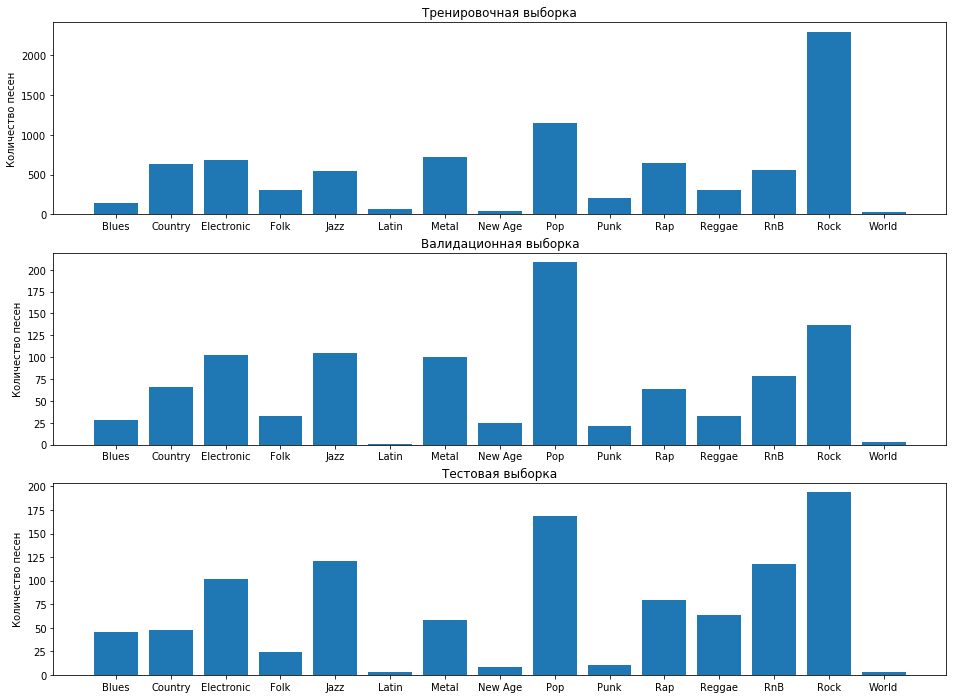

In [14]:
plt.figure(figsize=(16, 12))

plt.subplot(3, 1, 1)
plt.bar(list(train_stats.keys()), train_stats.values())
plt.title('Тренировочная выборка')
plt.ylabel('Количество песен')

plt.subplot(3, 1, 2)
plt.bar(list(val_stats.keys()), val_stats.values())
plt.title('Валидационная выборка')
plt.ylabel('Количество песен')

plt.subplot(3, 1, 3)
plt.bar(list(test_stats.keys()), test_stats.values())
plt.title('Тестовая выборка')
plt.ylabel('Количество песен')
plt.savefig('train_test_split.jpg')
plt.show()

# Preprocess text

In [17]:
from time import time
import numpy as np
import string

from techniques import *

In [21]:
finalTokens = [] # all tokens
stoplist = stopwords.words('english')

In [22]:
lemmatizer = WordNetLemmatizer() # set lemmatizer
stemmer = PorterStemmer() # set stemmer

In [95]:
def tokenize(text):
    totalAdjectives = 0
    totalAdverbs = 0
    totalVerbs = 0
    onlyOneSentenceTokens = [] # tokens of one sentence each time

    tokens = nltk.word_tokenize(text)
    
    tokens = replaceNegations(tokens) # Technique 6: finds "not" and antonym for the next word and if found, replaces not and the next word with the antonym
    
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator) # Technique 7: remove punctuation

    tokens = nltk.word_tokenize(text) # it takes a text as an input and provides a list of every token in it
    
### NO POS TAGGING BEGIN (If you don't want to use POS Tagging keep this section uncommented) ###
    
    for w in tokens:

        if (w not in stoplist): # Technique 10: remove stopwords
            final_word = addCapTag(w) # Technique 8: Finds a word with at least 3 characters capitalized and adds the tag ALL_CAPS_
            
            final_word = final_word.lower() # Technique 9: lowercases all characters

            final_word = replaceElongated(final_word) # Technique 11: replaces an elongated word with its basic form, unless the word exists in the lexicon
            
            #if len(final_word)>1:
            #    final_word = spellCorrection(final_word) # Technique 12: correction of spelling errors
            final_word = lemmatizer.lemmatize(final_word) # Technique 14: lemmatizes words
            final_word = stemmer.stem(final_word) # Technique 15: apply stemming to words


            
            onlyOneSentenceTokens.append(final_word)           
            finalTokens.append(final_word)

         
    onlyOneSentence = " ".join(onlyOneSentenceTokens) # form again the sentence from the list of tokens
    #print(onlyOneSentence) # print final sentence

    
    """ Write the preprocessed text to file """
    #with open("result.txt", "a") as result:
    #    result.write(textID+"\t"+y+"\t"+onlyOneSentence+"\n")
        
    return finalTokens

In [126]:
def preprocess(text):
    text = replaceURL(text) # Technique 1
    text = replaceAtUser(text) # Technique 1
    text = removeHashtagInFrontOfWord(text) # Technique 1

    temp_slangs, temp_slangsFound = countSlang(text)
    #totalSlangs += temp_slangs # total slangs for all sentences
    for word in temp_slangsFound:
        totalSlangsFound.append(word) # all the slangs found in all sentences

    text = replaceSlang(text) # Technique 2: replaces slang words and abbreviations with their equivalents
    text = replaceContraction(text) # Technique 3: replaces contractions to their equivalents
    text = removeNumbers(text) # Technique 4: remove integers from text

    emoticons = countEmoticons(text) # how many emoticons in this sentence
    #totalEmoticons += emoticons

    text = removeEmoticons(text) # removes emoticons from text


    #totalAllCaps += countAllCaps(text)

    #totalMultiExclamationMarks += countMultiExclamationMarks(text) # how many repetitions of exlamation marks in this sentence
    #totalMultiQuestionMarks += countMultiQuestionMarks(text) # how many repetitions of question marks in this sentence
    #totalMultiStopMarks += countMultiStopMarks(text) # how many repetitions of stop marks in this sentence

    text = replaceMultiExclamationMark(text) # Technique 5: replaces repetitions of exlamation marks with the tag "multiExclamation"
    text = replaceMultiQuestionMark(text) # Technique 5: replaces repetitions of question marks with the tag "multiQuestion"
    text = replaceMultiStopMark(text) # Technique 5: replaces repetitions of stop marks with the tag "multiStop"

    #totalElongated += countElongated(text)
    tokens = tokenize(text) 
    sentense = " ".join(tokens)
    return sentense

# Preprocess

In [121]:
dataset_clean.head()

,msd_track_id,genre,album_index,set,msd_artist_id,image_url,song_title,song_lyrics,artist,lyrics_link,lyrics_text,lyrics,lyrics_clean
0,TRABKJU128F422A7FE,Metal,0,train,ARBD4QW1187FB42153,http://artwork-cdn.7static.com/static/img/slee...,The Illusionist,NaN,Scar Symmetry,https://www.lyricsfreak.com/s/scar+symmetry/th...,as an outcast i paced defeat seeking comfort i...,as an outcast i paced defeat seeking comfort i...,0
1,TRDMMDE128F14A9052,Rock,2,train,ARJVTRE1187B9959C0,http://artwork-cdn.7static.com/static/img/slee...,Weekend Driver,NaN,Foghat,https://www.lyricsfreak.com/f/foghat/weekend+d...,dave peverett - riff bros. music - ascap waiti...,dave peverett - riff bros. music - ascap waiti...,1
2,TRJOPZB128F4250E02,Rock,4,train,AR62BB21187B9AC83D,http://artwork-cdn.7static.com/static/img/slee...,Too Alive,NaN,The Breeders,https://www.lyricsfreak.com/b/breeders/too+ali...,i took off when will will make no way steal it...,i took off when will will make no way steal it...,2
3,TRJKBVL128F935567B,Rock,5,train,AR7GVOV1187B9B5FF1,http://artwork-cdn.7static.com/static/img/slee...,Ride The Darker Wave,NaN,Sebadoh,https://www.lyricsfreak.com/s/sebadoh/ride+the...,you make your words so nice i'm waiting you to...,you make your words so nice i'm waiting you to...,3
4,TRUSOQD128F92CFEA5,Rock,7,train,ARZHQDD1187FB5B871,http://artwork-cdn.7static.com/static/img/slee...,Carmen,Last night she ran away \nLeft a letter by th...,Lush,https://www.lyricsfreak.com/l/lush/carmen_2008...,(anderson/berenyi) carmen tells me what she's ...,(anderson/berenyi) carmen tells me what she's ...,4


In [122]:
dataset_clean['lyrics_clean'] = None

In [113]:
dataset_clean.at['lyrics_clean', '0']

ValueError: At based indexing on an integer index can only have integer indexers

In [ ]:
for i in tqdm.tqdm(dataset_clean.index):
    dataset_clean.at[i, 'lyrics_clean'] = preprocess(dataset_clean.at[i, 'lyrics'])

 24%|██▎       | 2454/10382 [01:15<19:33,  6.76it/s]

In [ ]:
dataset_clean

# TFIDF

# Sample use

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
]

In [74]:
vectorizer = TfidfVectorizer()

In [75]:
X = vectorizer.fit_transform(corpus)

In [76]:
X.shape

(4, 9)

In [79]:
y = [1, 2, 3, 1]

# Log reg

In [80]:
from sklearn.linear_model import LogisticRegression

In [84]:
model = LogisticRegression(solver='lbfgs')

In [85]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
model.predict(X)

array([1, 1, 1, 1])

# Evaluate

In [12]:
from collections import Counter

import pandas as pd
import torchwordemb
import torch

import util as ut


class VocabBuilder(object):
    '''
    Read file and create word_to_index dictionary.
    This can truncate low-frequency words with min_sample option.
    '''
    def __init__(self, path_file=None):
        # word count
        self.word_count = VocabBuilder.count_from_file(path_file)
        self.word_to_index = {}

    @staticmethod
    def count_from_file(path_file, tokenizer=ut._tokenize):
        """
        count word frequencies in a file.
        Args:
            path_file:
        Returns:
            dict: {word_n :count_n, ...}
        """
        df = pd.read_csv(path_file, delimiter='\t')
        # tokenize
        df['body'] = df['body'].apply(tokenizer)
        # count
        word_count = Counter([tkn for sample in df['body'].values.tolist() for tkn in sample])
        print('Original Vocab size:{}'.format(len(word_count)))
        return word_count

    def get_word_index(self, min_sample=1, padding_marker='__PADDING__', unknown_marker='__UNK__',):
        """
        create word-to-index mapping. Padding and unknown are added to last 2 indices.
        Args:
            min_sample: for Truncation
            padding_marker: padding mark
            unknown_marker: unknown-word mark
        Returns:
            dict: {word_n: index_n, ... }
        """
        # truncate low fq word
        _word_count = filter(lambda x:  min_sample<=x[1], self.word_count.items())
        tokens = zip(*_word_count)[0]

        # inset padding and unknown
        self.word_to_index = { tkn: i for i, tkn in enumerate([padding_marker, unknown_marker] + sorted(tokens))}
        print('Turncated vocab size:{} (removed:{})'.format(len(self.word_to_index),
                                                            len(self.word_count) - len(self.word_to_index)))
        return self.word_to_index, None


class GloveVocabBuilder(object) :

    def __init__(self, path_glove):
        self.vec = None
        self.vocab = None
        self.path_glove = path_glove

    def get_word_index(self, padding_marker='__PADDING__', unknown_marker='__UNK__',):
        _vocab, _vec = torchwordemb.load_glove_text(self.path_glove)
        vocab = {padding_marker:0, unknown_marker:1}
        for tkn, indx in _vocab.items():
            vocab[tkn] = indx + 2
        vec_2 = torch.zeros((2, _vec.size(1)))
        vec_2[1].normal_()
        self.vec = torch.cat((vec_2, _vec))
        self.vocab = vocab
        return self.vocab, self.vec

ModuleNotFoundError: No module named 'torchwordemb'

In [10]:
text = 'dave peveret riff bro music ascap waitin weekend soon comin around hangin best friend glad found weekday emot gon na leav em behind get togeth crazi time talkin bout weekend driver live without talkin bout weekend driver yeah waitin weekend watch clock wall throw deep end hear call workin week survivor cool refin get togeth anoth kind talkin bout weekend driver live without talkin bout weekend driver yeah matter far go back work monday weekend anoth memori yeah didgerido erik slide solo talkin bout weekend driver live without talkin bout weekend driver yeah talkin bout weekend driver live without yeah talkin bout weekend driver yeah yeaeyeah oh yeah yeah oh yeah yeaeyeah'

In [11]:
text

'dave peveret riff bro music ascap waitin weekend soon comin around hangin best friend glad found weekday emot gon na leav em behind get togeth crazi time talkin bout weekend driver live without talkin bout weekend driver yeah waitin weekend watch clock wall throw deep end hear call workin week survivor cool refin get togeth anoth kind talkin bout weekend driver live without talkin bout weekend driver yeah matter far go back work monday weekend anoth memori yeah didgerido erik slide solo talkin bout weekend driver live without talkin bout weekend driver yeah talkin bout weekend driver live without yeah talkin bout weekend driver yeah yeaeyeah oh yeah yeah oh yeah yeaeyeah'